In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import folium 
import json
import math
from math import radians, cos, sin, asin, sqrt
import itertools
import statistics as stats
from statistics import mean

import bokeh

print('All imported!')

All imported!


In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, column
from ipywidgets import interact
from bokeh.models import ColumnDataSource, FactorRange, Select, CustomJS
from bokeh.plotting import output_file, save, figure, show


output_notebook()

Loading BokehJS ...

In [15]:
merged_data = pd.read_csv('merged_data.csv')
mdata = merged_data[merged_data.Year != 2025]
print('Data read!')

Data read!


In [16]:
mdata.loc[:,'Month number'] = mdata['Month'].replace({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})
mdata.head()

/var/folders/8c/7zdp5y6j3fbbjxh65ghw770w0000gn/T/ipykernel_22031/965317985.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mdata.loc[:,'Month number'] = mdata['Month'].replace({
/var/folders/8c/7zdp5y6j3fbbjxh65ghw770w0000gn/T/ipykernel_22031/965317985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdata.loc[:,'Month number'] = mdata['Month'].replace({


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Month number
0,ROBBERY,INGLESIDE,-122.420084,37.708311,2004-11-22,17:50,17,Monday,22,November,2004,11
1,VEHICLE THEFT,PARK,-120.500000,90.000000,2005-10-18,20:00,20,Tuesday,18,October,2005,10
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2004-02-15,02:00,2,Sunday,15,February,2004,2
3,ARSON,INGLESIDE,-122.436220,37.724377,2011-02-18,05:27,5,Friday,18,February,2011,2
4,ASSAULT,SOUTHERN,-122.410541,37.770913,2010-11-21,17:00,17,Sunday,21,November,2010,11


In [17]:
focus_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
focus_crimes.sort()
print(focus_crimes)

['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'PROSTITUTION', 'ROBBERY', 'STOLEN PROPERTY', 'VANDALISM', 'VEHICLE THEFT', 'WEAPON LAWS']


In [18]:
# Set global font
plt.rcParams['font.family'] = 'Georgia'  # Use 'sans-serif', 'monospace', 'cursive', etc.
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.weight'] = 'normal'  # Options: 'light', 'normal', 'bold'
print('Pretty :)')

Pretty :)


In [19]:
#saving just the needed data. looking more closely into drug/narcotic crimes.

df_drug = mdata[(mdata['Category'] == 'DRUG/NARCOTIC')].reset_index(drop=True)
print('Data has been filtered to DRUG / NARCOTIC and TENDERLOIN. It is saved as df_drug.')
df_drug.head()
#& (mdata['PdDistrict'] == 'TENDERLOIN')

Data has been filtered to DRUG / NARCOTIC and TENDERLOIN. It is saved as df_drug.


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Month number
0,DRUG/NARCOTIC,INGLESIDE,-122.441875,37.719082,2003-06-12,20:25,20,Thursday,12,June,2003,6
1,DRUG/NARCOTIC,TENDERLOIN,-122.414433,37.784658,2006-01-03,01:15,1,Tuesday,3,January,2006,1
2,DRUG/NARCOTIC,TENDERLOIN,-122.412883,37.785353,2003-12-18,00:01,0,Thursday,18,December,2003,12
3,DRUG/NARCOTIC,SOUTHERN,-122.413564,37.779514,2003-05-21,09:20,9,Wednesday,21,May,2003,5
4,DRUG/NARCOTIC,RICHMOND,-122.442365,37.784875,2006-01-27,11:59,11,Friday,27,January,2006,1


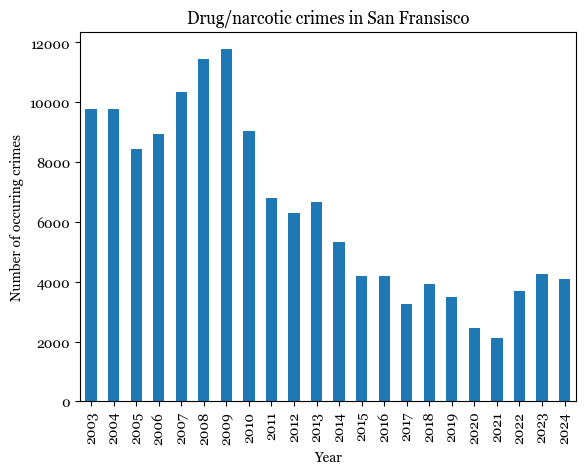

In [20]:
#counts
counts = df_drug.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
counts.columns = ['Year', 'Count']
plot = counts.plot(x = 'Year', y= 'Count', kind = 'bar', legend = False, title = 'Drug/narcotic crimes in San Fransisco', ylabel = 'Number of occuring crimes')

In [21]:
yearly_drug_numbers = df_drug.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
yearly_drug_numbers.columns = ['Year', 'Count']
print(yearly_drug_numbers)

    Year  Count
0   2003   9784
1   2004   9792
2   2005   8444
3   2006   8943
4   2007  10360
5   2008  11456
6   2009  11771
7   2010   9036
8   2011   6802
9   2012   6307
10  2013   6672
11  2014   5324
12  2015   4194
13  2016   4202
14  2017   3265
15  2018   3920
16  2019   3476
17  2020   2452
18  2021   2134
19  2022   3690
20  2023   4261
21  2024   4082


In [22]:
#same but normalized to the total number of crimes
crimes_per_year = mdata.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
crimes_per_year.columns = ['Year', 'All crimes']
crimes_per_year.head()

,Year,All crimes
0,2003,142803
1,2004,142054
2,2005,137048
3,2006,131856
4,2007,131771


In [23]:
counts.loc[:,'All crimes'] = crimes_per_year['All crimes']
counts.loc[:, 'Drug/narcotic, normalized'] = counts['Count'] / counts['All crimes'] * 100
counts.head()

,Year,Count,All crimes,"Drug/narcotic, normalized"
0,2003,9784,142803,6.851397
1,2004,9792,142054,6.893153
2,2005,8444,137048,6.161345
3,2006,8943,131856,6.782399
4,2007,10360,131771,7.862124


In [24]:
counts.keys()

Index(['Year', 'Count', 'All crimes', 'Drug/narcotic, normalized'], dtype='object')

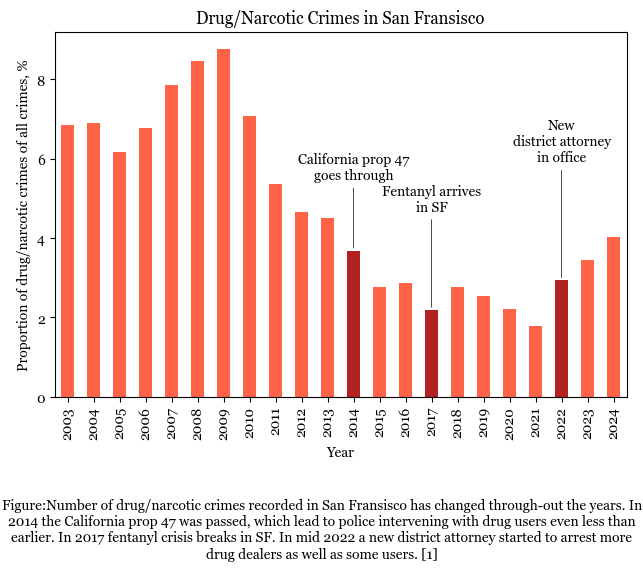

In [26]:
years_to_highlight = [2014, 2017, 2022]
bar_colors = ['firebrick' if year in years_to_highlight else 'tomato' for year in counts['Year']]
plot = counts.plot(x = 'Year',
                   y = 'Drug/narcotic, normalized',
                   kind = 'bar',
                   legend = False,
                   title = 'Drug/Narcotic Crimes in San Fransisco',
                   ylabel = 'Proportion of drug/narcotic crimes of all crimes, %',
                   color = bar_colors)

#annotation for the year 2014 to highlight change in legislation
# Get the Y value for 2014
bar_index_14 = counts[counts['Year']==2014].index[0]
y_val_14 = counts.loc[counts['Year']==2014, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'California prop 47\ngoes through',
    xy = (bar_index_14, y_val_14),
    xytext = (0, 60),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

#annotation for the year 2017 to highlight fentanyl's arrival in SF
# Get the Y value for 2017
bar_index_17 = counts[counts['Year']==2017].index[0]
y_val_17 = counts.loc[counts['Year']==2017, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'Fentanyl arrives\nin SF',
    xy = (bar_index_17, y_val_17),
    xytext = (0, 80),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

#annotation for the year 2022 to highlight a new distirct attorney
# Get the Y value for 2022
bar_index_22 = counts[counts['Year']==2022].index[0]
y_val_22 = counts.loc[counts['Year']==2022, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'New\ndistrict attorney\nin office',
    xy = (bar_index_22, y_val_22),
    xytext = (0, 100),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

plt.figtext(
    0.5, -0.05,
    'Figure:Number of drug/narcotic crimes recorded in San Fransisco has changed through-out the years. In 2014 the California prop 47 was passed, which lead to police intervening with drug users even less than earlier. In 2017 fentanyl crisis breaks in SF. In mid 2022 a new district attorney started to arrest more drug dealers as well as some users. [1]',
    wrap = True,
    horizontalalignment = 'center',
    verticalalignment = 'top',
    fontsize = 10,
    style = 'normal'
)
plt.tight_layout()
plt.savefig("overview.png", dpi=300, bbox_inches='tight', facecolor='white')


In [277]:
df_drug_2022 = df_drug[df_drug['Year']==2022].reset_index(drop=True)
#counts
counts_2022 = df_drug_2022.value_counts('Month').reset_index().reset_index(drop=True)
counts_2022.columns = ['Month', 'Count']
counts_2022.loc[:, 'Month number'] = counts_2022['Month'].replace({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})
counts_2022 = counts_2022.sort_values(by='Month number').reset_index(drop=True)


/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_16392/677281939.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts_2022.loc[:, 'Month number'] = counts_2022['Month'].replace({


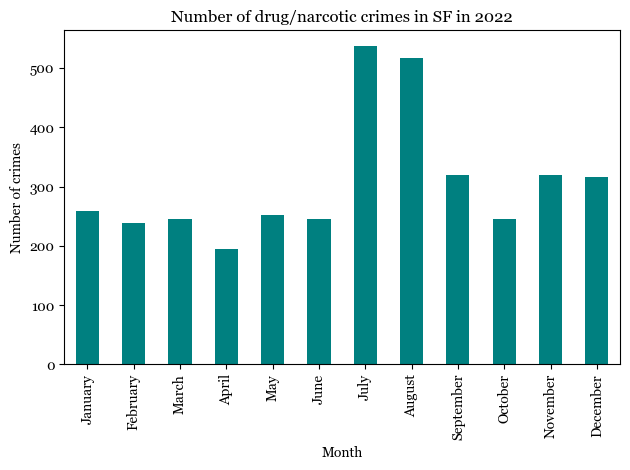

In [278]:
plot = counts_2022.plot(x = 'Month',
                        y = 'Count',
                        kind = 'bar',
                        title = 'Number of drug/narcotic crimes in SF in 2022',
                        ylabel = 'Number of crimes',
                        legend = False,
                        color = 'teal')
plt.tight_layout()
plt.show()

In [150]:
df_drug.head()

,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Month number
0,DRUG/NARCOTIC,INGLESIDE,-122.441875,37.719082,2003-06-12,20:25,20,Thursday,12,June,2003,6
1,DRUG/NARCOTIC,TENDERLOIN,-122.414433,37.784658,2006-01-03,01:15,1,Tuesday,3,January,2006,1
2,DRUG/NARCOTIC,TENDERLOIN,-122.412883,37.785353,2003-12-18,00:01,0,Thursday,18,December,2003,12
3,DRUG/NARCOTIC,SOUTHERN,-122.413564,37.779514,2003-05-21,09:20,9,Wednesday,21,May,2003,5
4,DRUG/NARCOTIC,RICHMOND,-122.442365,37.784875,2006-01-27,11:59,11,Friday,27,January,2006,1


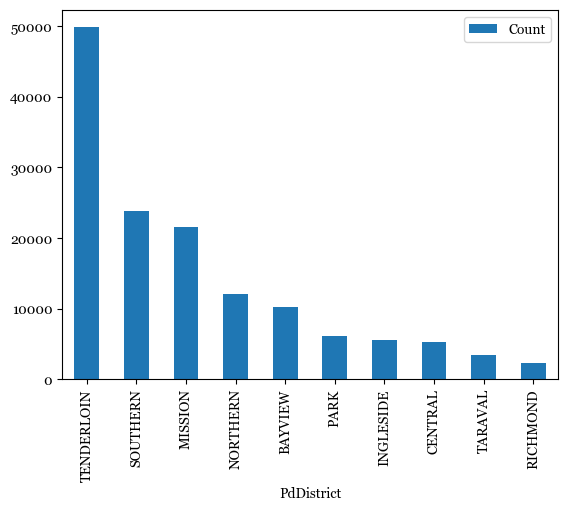

In [279]:
#let's look at the neighbourhoods

#counts
counts_area = df_drug.value_counts('PdDistrict').reset_index().reset_index(drop=True)
counts_area.columns = ['PdDistrict', 'Count']
counts_area.head()
plot = counts_area.plot(x = 'PdDistrict', y = 'Count', kind = 'bar')

In [333]:
years = list(range(2014, 2025))
districts = counts_area.PdDistrict.unique()

district_dict = {
    district: [] for district in districts
}


for district in district_dict:
    print(district)
    data = df_drug.loc[(df_drug['PdDistrict'] == district) & (df_drug['Year'].isin(years))]
    counts = data.value_counts('Year').reset_index().sort_values(by = 'Year').reset_index(drop = True)
    counts.columns = ['Year', 'Count']
    all_crime_in_district = counts['Count'].sum()
    district_dict[district] = counts

TENDERLOIN
SOUTHERN
MISSION
NORTHERN
BAYVIEW
PARK
INGLESIDE
CENTRAL
TARAVAL
RICHMOND


In [334]:
years = list(range(2014, 2025))
print(years)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


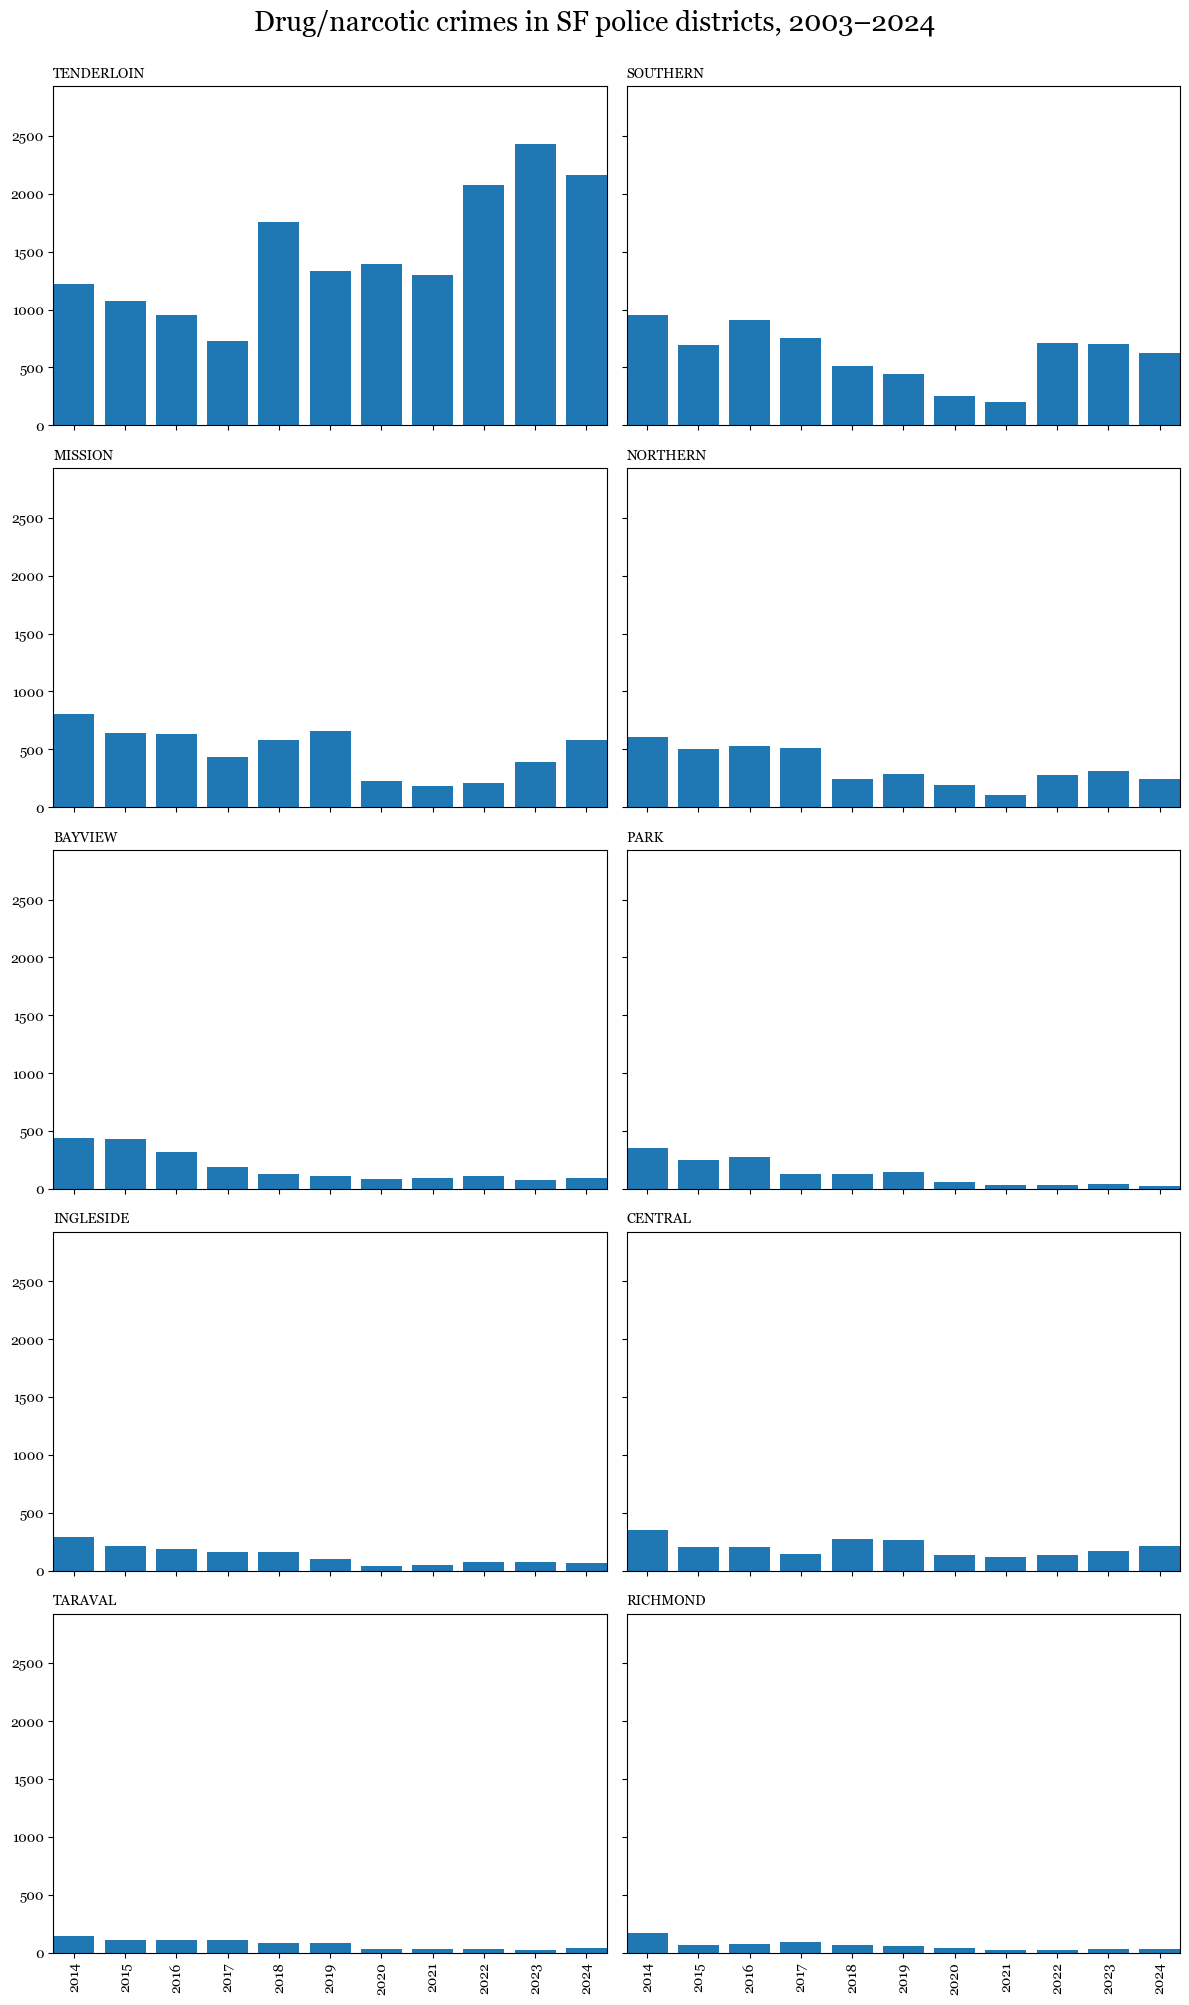

In [335]:
#time to plot

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12,20), sharex = True, sharey = True)
years = list(range(2014, 2025))
max_y = max([district_dict[d]['Count'].max() for d in districts])

for i, ax in enumerate(axes.flatten()):
    dist = districts[i]
    data = district_dict[dist]
    x = data['Year']
    y = data['Count']

    ax.bar(x, y, width = 0.8, align = 'center', label = dist)
    ax.set_xmargin(0)
    ax.set_ymargin(0.5)

    ax.set_ylim(0, max_y + 500)
    ax.set_title(dist, fontsize = 10, loc = 'left')
    ax.set_xticks(years) #setting my owns
    ax.set_xticklabels(years, rotation = 90)

plt.suptitle('Drug/narcotic crimes in SF police districts, 2003–2024', fontsize=20, y=1)
plt.tight_layout()
 

In [338]:
#let's add my district sums into a single dataframe to make life easier
pd_counts_df = pd.DataFrame(index = years)
pd_counts_norm_df = pd.DataFrame(index = years)

for dist in districts:
    data = district_dict[dist]
    year_series = data.set_index('Year')['Count']
    pd_counts_df[dist] = year_series
    pd_counts_norm_df[dist] = year_series / yearly_drug_numbers.set_index('Year')['Count']

pd_counts_norm_df.head()

,TENDERLOIN,SOUTHERN,MISSION,NORTHERN,BAYVIEW,PARK,INGLESIDE,CENTRAL,TARAVAL,RICHMOND
2014,0.229339,0.178625,0.151390,0.114012,0.082081,0.067055,0.054095,0.065552,0.026672,0.031180
2015,0.256795,0.165951,0.153314,0.120410,0.103004,0.059132,0.050548,0.049595,0.026705,0.014545
2016,0.227749,0.217277,0.150643,0.124703,0.076630,0.064969,0.045217,0.049262,0.025464,0.018087
2017,0.223890,0.231240,0.133844,0.156508,0.059112,0.040123,0.050230,0.045023,0.031853,0.028178
2018,0.447704,0.129847,0.147704,0.061224,0.031888,0.033163,0.041582,0.069643,0.020663,0.016582


Text(0.0, 1.0, 'Drug/narcotic crimes by SF Police District (2003–2024)')

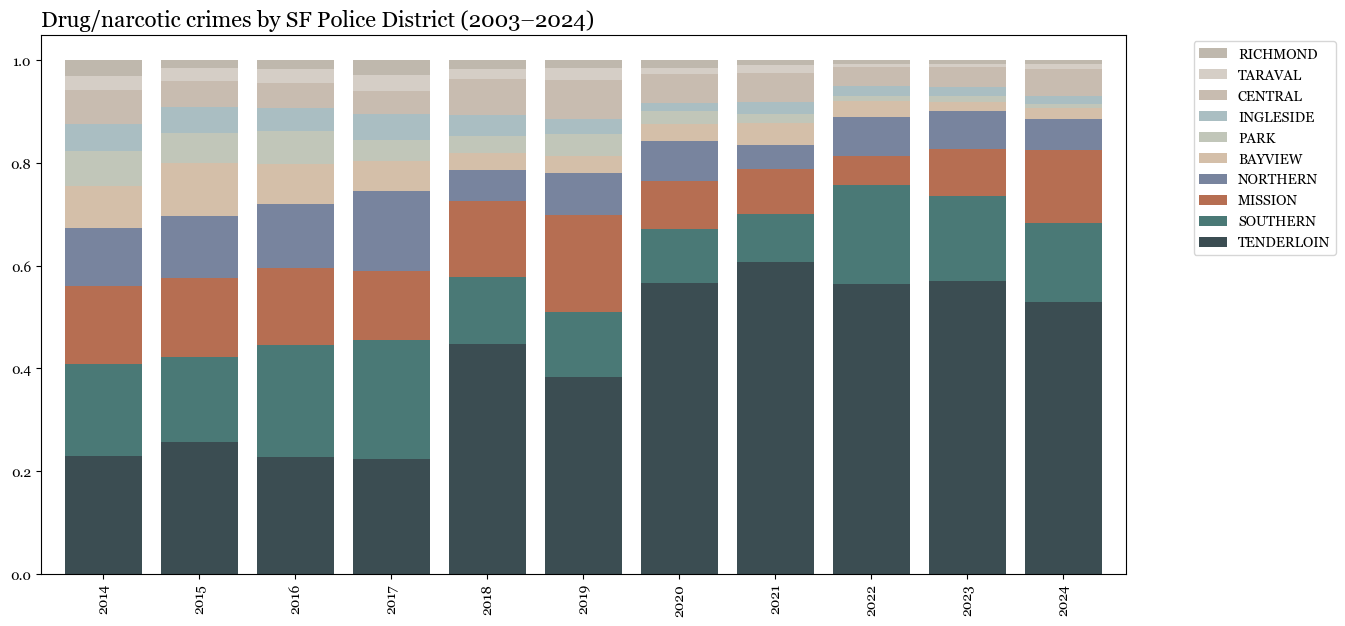

In [314]:
# Custom color map — highlight top 4
district_colors = {
    'TENDERLOIN': '#3b4d52',   # desaturated navy
    'SOUTHERN':   '#4a7976',   # dusty pine green
    'MISSION':    '#b66e52',   # muted clay/rust
    'NORTHERN':   '#78849e',   # dusty slate blue

    'BAYVIEW':    '#d4bfa9',   # muted tan
    'PARK':       '#c1c6b9',   # sage-grey
    'INGLESIDE':  '#aabec2',   # dusty seafoam
    'CENTRAL':    '#c8bcb0',   # greige
    'TARAVAL':    '#d5cec6',   # pale clay
    'RICHMOND':   '#bfb8ad'    # soft taupe
}
colors = [district_colors[d.upper()] for d in pd_counts_norm_df.columns]

pd_counts_norm_df.plot(
    kind = 'bar',
    stacked = True,
    figsize = (14,7),
    width = 0.8,
    color = colors,
    legend = False,
)

handels, labels = plt.gca().get_legend_handles_labels()
plt.legend(
        handels[::-1],
        labels[::-1],
        bbox_to_anchor = (1.2, 1),
        loc = 'upper right'
)

plt.title('Drug/narcotic crimes by SF Police District (2003–2024)', fontsize = 16, loc = 'left')

#adding a line to show that Tenderloin always dominates
#min_tenderloin = pd_counts_norm_df['TENDERLOIN'].min()
#plt.axhline(y = min_tenderloin, color = 'navy', linestyle = '--', linewidth = 2, alpha = 0.50)

    

In [354]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import all_palettes
from bokeh.transform import dodge
from bokeh.layouts import column
from bokeh.models import Legend
from bokeh.models import CheckboxButtonGroup, CustomJS
from bokeh.models import NumeralTickFormatter
from bokeh.models import Panel, Tabs
from bokeh.palettes import Category20
from bokeh.models import Div

output_notebook()

from bokeh.palettes import brewer
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.models import HoverTool

import pandas as pd
import numpy as np

# ── STEP 1: PREPARE DATA ─────────────────────────────────────
# Your DataFrame: pd_counts_norm_df (years as index, districts as columns)
normalized_df = pd_counts_norm_df.copy()
absolute_df = pd_counts_df.copy()
normalized_df.index = normalized_df.index.astype(str)  # Bokeh likes strings for x-axis
years = normalized_df.index.tolist()
districts = normalized_df.columns.tolist()

# ── STEP 2: BOKEH STACKED BAR SETUP ─────────────────────────
# Step 1: Create source with both normalized and absolute
source_data = {
    'years': years
}

for district in districts:
    source_data[district] = normalized_df[district].values  # normalized for plotting
    source_data[f"{district}_value"] = absolute_df[district].values  # for hover

source = ColumnDataSource(data=source_data)

# Pull your muted custom colors
district_colors = {
    'TENDERLOIN': '#3b4d52',
    'SOUTHERN':   '#4a7976',
    'MISSION':    '#b66e52',
    'NORTHERN':   '#78849e',
    'BAYVIEW':    '#d4bfa9',
    'PARK':       '#c1c6b9',
    'INGLESIDE':  '#aabec2',
    'CENTRAL':    '#c8bcb0',
    'TARAVAL':    '#d5cec6',
    'RICHMOND':   '#bfb8ad'
}
colors = [district_colors[d] for d in districts]

# ── STEP 3: CREATE FIGURE ────────────────────────────────────
p = figure(x_range=years, height=500, width=900,
           title="Drug/Narcotic Crimes by SF Police District (2014–2024)",
           toolbar_location="above", tools="pan,wheel_zoom,box_zoom,reset,save")

# Stacked bars
renderers = p.vbar_stack(districts, x='years', width=0.9, color=colors, source=source,
                         legend_label=districts)

# ── STEP 4: TOOLS, STYLING, LEGEND ───────────────────────────

for district, renderer in zip(districts, renderers):
    hover = HoverTool(
        renderers=[renderer],
        tooltips=[
            ("Year", "@years"),
            (f"District", f"{district}"),
            ("Proportion", f"@{district}{{0.00%}}"),
            ("Number of crimes", f"@{district}_value{{0,0}}")
        ]
    )
    p.add_tools(hover)

p.y_range.start = 0
p.yaxis.formatter = NumeralTickFormatter(format="0%")
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.label_text_font_size = "10pt"
p.title.text_font_size = "14pt"
p.title.align = 'left'
# Reverse renderers and district names to match stack order
reversed_renderers = renderers[::-1]
reversed_districts = districts[::-1]

# Clear existing legend if needed
p.legend.items = []

# Add new legend manually
from bokeh.models import Legend
legend = Legend(items=[
    (name, [r]) for name, r in zip(reversed_districts, reversed_renderers)
])
p.add_layout(legend, 'right')


# ── STEP 5: SHOW ─────────────────────────────────────────────
show(p)

Loading BokehJS ...

In [35]:
#prepping to calculate the statistic for my bokeh thingy

df = mdata[(mdata['Category'].isin(focus_crimes))].reset_index(drop=True)

#initiating the weekly hours to the dataset
#to count for the weekly hours, let's create a new column to the dataset with the info about the weekhour

df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({
   'Monday': 0,
    'Tuesday':1, 
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6})

df.loc[:,'HourOfWeek'] = df['Weekday number']* 24 + df['TimeOfDay']

print('Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.')
df.head()

Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.


/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_32903/2438275899.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Weekday number,HourOfWeek
0,ROBBERY,INGLESIDE,-122.420084,37.708311,2004-11-22,17:50,17,Monday,22,November,2004,0,17
1,VEHICLE THEFT,PARK,-120.500000,90.000000,2005-10-18,20:00,20,Tuesday,18,October,2005,1,44
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2004-02-15,02:00,2,Sunday,15,February,2004,6,146
3,ASSAULT,SOUTHERN,-122.410541,37.770913,2010-11-21,17:00,17,Sunday,21,November,2010,4,113
4,ASSAULT,TARAVAL,-122.470366,37.745158,2013-04-02,15:50,15,Tuesday,2,April,2013,6,159


In [45]:
#Weekly 168 h cycle
l = len(focus_crimes)
hour_counts = pd.DataFrame()

for i in range(l):
    data = df[df.Category == focus_crimes[i]]
    hour_count = data.value_counts('HourOfWeek').reset_index()
    hour_count.columns = ['HourOfWeek', focus_crimes[i]]
    hour_count = hour_count.sort_values(by = 'HourOfWeek').reset_index(drop=True)
    hour_counts[focus_crimes[i]] = hour_count[focus_crimes[i]]
hour_counts.head()

,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,1649,892,586,4191,208,524,115,1365,958,243
1,1496,588,351,2486,152,564,68,922,585,178
2,1279,704,273,1561,116,533,68,878,452,148
3,643,775,228,1137,76,291,43,664,346,98
4,435,765,154,772,56,223,49,454,282,84


In [43]:
#creating the pairs for the options
other_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
pairs = [('DRUG/NARCOTIC', crime) for crime in other_crimes]
print(pairs)


[('DRUG/NARCOTIC', 'WEAPON LAWS'), ('DRUG/NARCOTIC', 'PROSTITUTION'), ('DRUG/NARCOTIC', 'ROBBERY'), ('DRUG/NARCOTIC', 'BURGLARY'), ('DRUG/NARCOTIC', 'ASSAULT'), ('DRUG/NARCOTIC', 'LARCENY/THEFT'), ('DRUG/NARCOTIC', 'VANDALISM'), ('DRUG/NARCOTIC', 'VEHICLE THEFT'), ('DRUG/NARCOTIC', 'STOLEN PROPERTY')]


In [44]:
#defining a function to calculate R2
def get_R2(y, p):
    n = len(x)
    y_mean = 1/n * sum(y)
    SSres = sum((y-p)**2)
    SStot = sum((y-y_mean)**2)
    R2 = 1 - (SSres/SStot)

    return R2

In [59]:
# Initial source data
source = ColumnDataSource(hour_counts)
full_data = hour_counts.to_dict(orient='list')
# Plot
p = figure(height=400, width=600, title="Compare with DRUG/NARCOTIC")
p.scatter('DRUG/NARCOTIC', 'ASSAULT', size=10, source=source)
p.xaxis.axis_label = 'DRUG/NARCOTIC'
p.yaxis.axis_label = 'selected other crime'


# Dropdown selector
select = Select(title="Compare to:", value="ASSAULT", options=other_crimes)

# JavaScript callback to update plot
select.js_on_change('value', CustomJS(args=dict(source=source, full_data=full_data), code="""
    const selected = cb_obj.value;
    source.data['y'] = full_data[selected];
    source.change.emit();
"""))

layout = column(select, p)
output_file("interactive_crime_compare.html")
show(layout)